# **Data analysis & visualization**

→ In this notebook the data is analyzed and a first impression of the data is gained.

The data was obtained from the following site: https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction

### **_IMPORTS_**

In [77]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **_RAW DATA_**

In [78]:
data = pd.read_csv("../data/raw/calories.csv")
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [79]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [80]:
unique_users = data["User_ID"].nunique()
print(f"There are a total of { unique_users } different users in this data set")

There are a total of 15000 different users in this data set


In [98]:
unique_users_per_gender = data.groupby("Gender")["User_ID"].nunique()
print(unique_users_per_gender)

Gender
female    7553
male      7447
Name: User_ID, dtype: int64


In [99]:
summary = pd.DataFrame({
    "Null-Werte": data.isnull().sum(),  # Check if there are "NAN" values per column
    "0-Werte": (data == 0.0).sum(),       # Check if there are "0.0" values per column
    "Anzahl Werte": data.count()        # Normal values
})
print(summary)


            Null-Werte  0-Werte  Anzahl Werte
User_ID              0        0         15000
Gender               0        0         15000
Age                  0        0         15000
Height               0        0         15000
Weight               0        0         15000
Duration             0        0         15000
Heart_Rate           0        0         15000
Body_Temp            0        0         15000
Calories             0        0         15000


Looks like the data is good and no values are missing 

### **_VISUALIZATIONS_**

#### Histograms of the numerical variables:

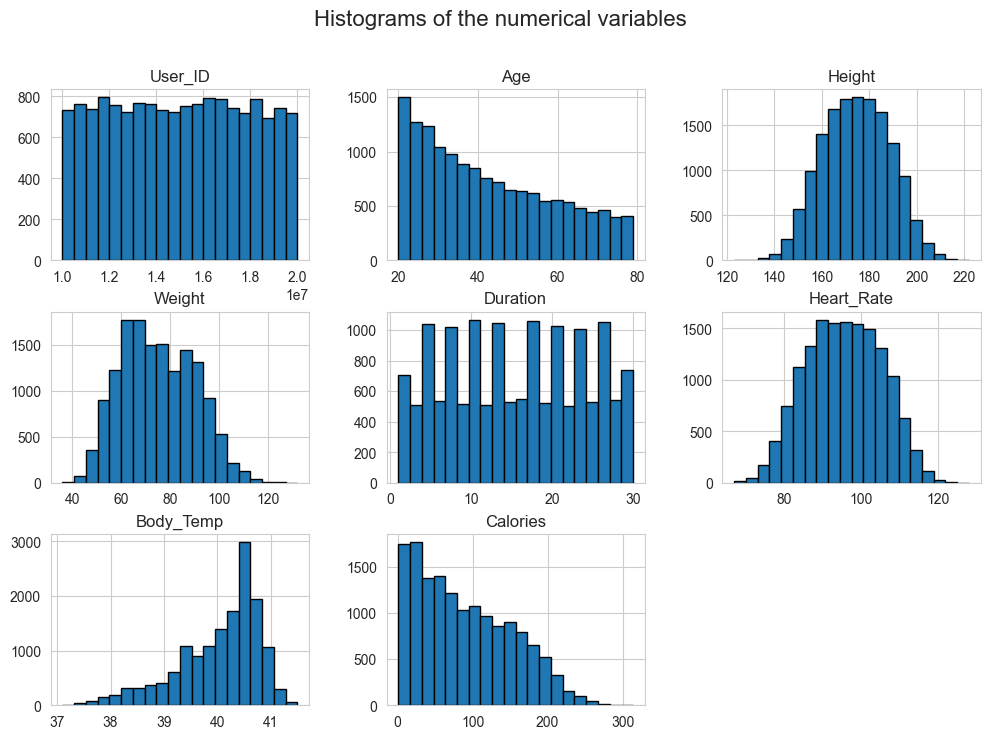

In [83]:
data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of the numerical variables", fontsize=16)
plt.show()

#### Analysis of the features for outliers:

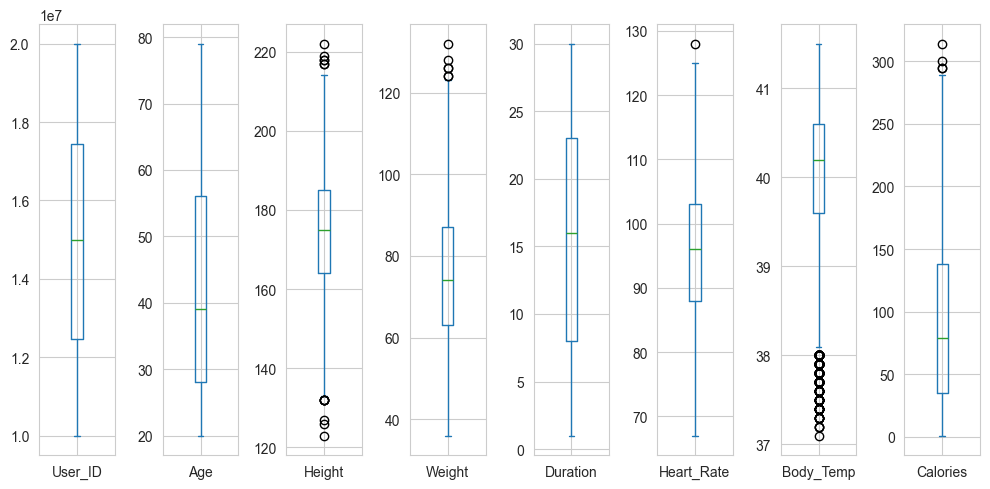

In [97]:
data.plot.box(subplots=True, figsize=(10,5))
plt.tight_layout()

#### Boxplot for calorie burned by gender:

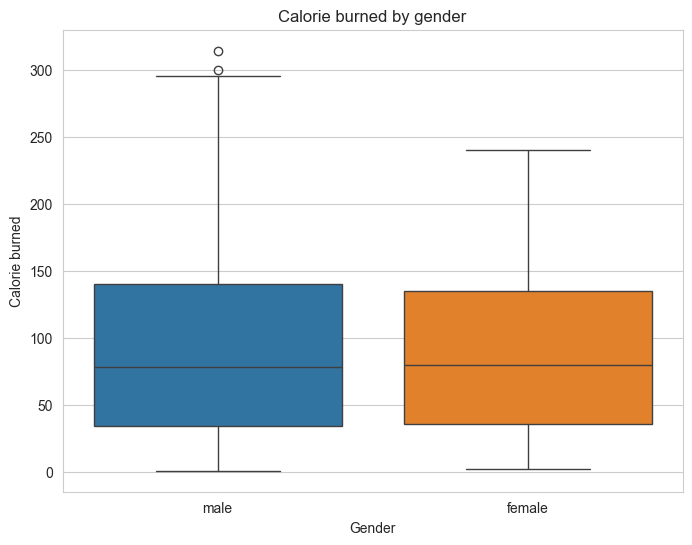

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Calories", data=data, hue="Gender", legend=False)
plt.xlabel("Gender")
plt.ylabel("Calorie burned")
plt.title("Calorie burned by gender")
plt.show()

#### Scatterplot of duration vs. calories burned:

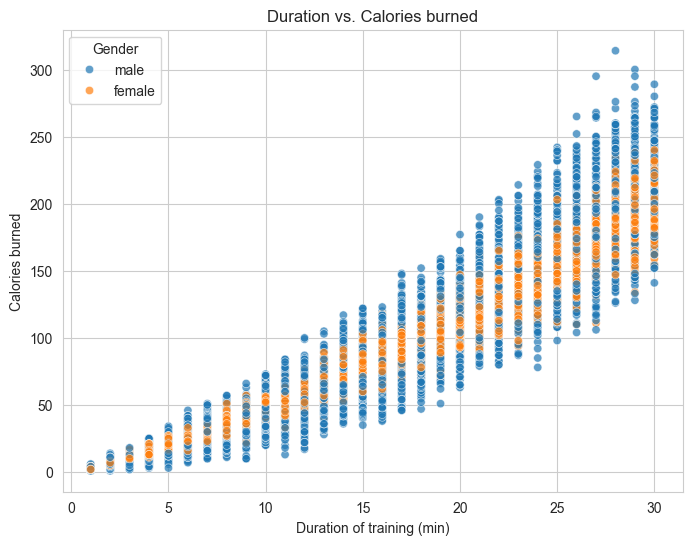

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Duration", y="Calories", hue="Gender", data=data, alpha=0.7)
plt.xlabel("Duration of training (min)")
plt.ylabel("Calories burned")
plt.title("Duration vs. Calories burned")
plt.show()

#### Linediagram of the heartrate compared to calories burned:

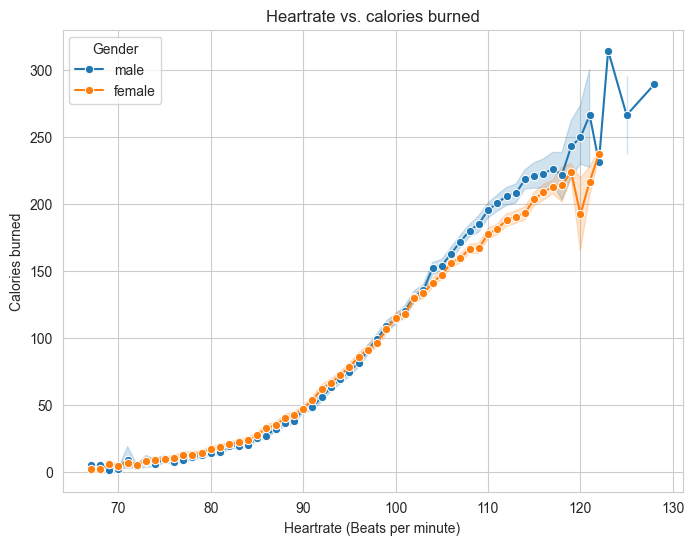

In [86]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Heart_Rate", y="Calories", hue="Gender", data=data, marker="o")
plt.xlabel("Heartrate (Beats per minute)")
plt.ylabel("Calories burned")
plt.title("Heartrate vs. calories burned")
plt.show()

Heatmap with correlation of features

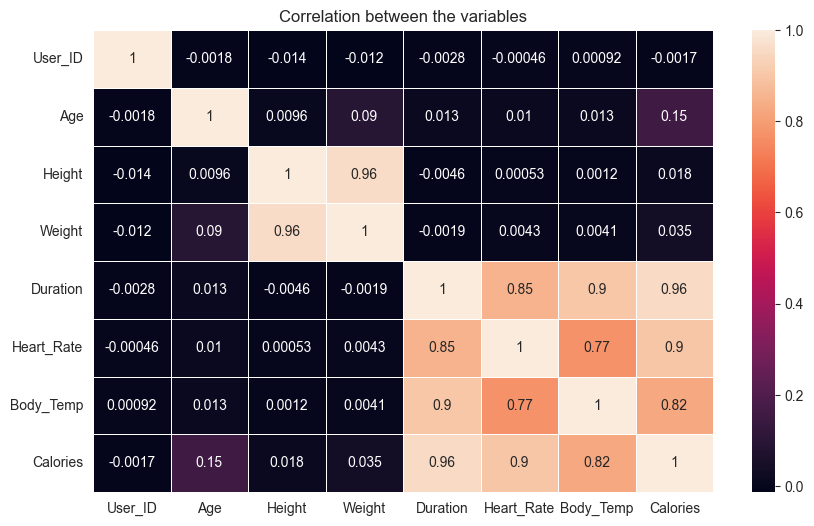

In [ ]:
corr_matrix = data[data.select_dtypes(np.number).columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title("Correlation between the features")
plt.show()

## The following can be said from all plots:
- the longer the duration, the more calories are burned
- the higher the heart rate, the more calories are burned
- Women burn fewer calories than men from 150 heartbeats per minute
- duration correlates with Heart_rate, Body_temp and calories burned
- age hardly correlates with calories burned -> age has hardly any effect